In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

Text(0.5, 0, 'Value of output from linear regression')

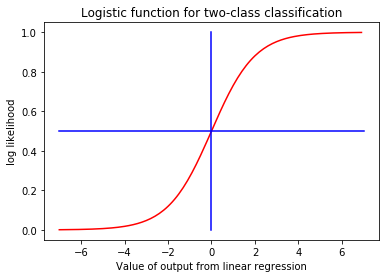

In [2]:
xseq = np.arange(-7, 7, 0.1)
logistic = [math.exp(v)/(1 + math.exp(v)) for v in xseq]
plt.plot(xseq, logistic, color = 'red')
plt.plot([-7,7], [0.5,0.5], color = 'blue')
plt.plot([0,0], [0,1], color = 'blue')
plt.title('Logistic function for two-class classification')
plt.ylabel('log likelihood')
plt.xlabel('Value of output from linear regression')

In [3]:
credit = pd.read_csv('German_Credit_Preped.csv')
print(credit.shape)
credit.head()

(1000, 27)


,Unnamed: 0,customer_id,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,...,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit,dummy,log_loan_duration_mo,log_loan_amount,log_age_yrs
0,0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,...,2,skilled,1,yes,yes,0,1.0,1.791759,7.063904,4.204693
1,1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,...,1,skilled,1,none,yes,1,1.0,3.871201,8.691315,3.091042
2,2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,...,1,unskilled-resident,2,none,yes,0,1.0,2.484907,7.647786,3.891820
3,3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,...,1,skilled,2,none,yes,0,1.0,3.737670,8.972337,3.806662
4,4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,...,2,skilled,2,none,yes,1,1.0,3.178054,8.490849,3.970292


In [4]:
credit_counts = credit[['credit_history', 'bad_credit']].groupby('bad_credit').count()
print(credit_counts)

            credit_history
bad_credit                
0                      700
1                      300


In [5]:
labels = np.array(credit['bad_credit'])
print(labels)

[0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [6]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['credit_history', 'purpose', 'gender_status', 
                       'time_in_residence', 'property']

Features = encode_string(credit['checking_account_status'])
for col in categorical_columns:
    temp = encode_string(credit[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])

(1000, 31)
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 1. 0.]]


In [7]:
Features = np.concatenate([Features, np.array(credit[['loan_duration_mo', 'loan_amount', 
                            'payment_pcnt_income', 'age_yrs']])], axis = 1)
print(Features.shape)
print(Features[:2, :])

(1000, 35)
[[0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 6.000e+00 1.169e+03 4.000e+00 6.700e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 4.800e+01 5.951e+03 2.000e+00 2.200e+01]]


In [8]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [9]:
scaler = preprocessing.StandardScaler().fit(X_train[:,34:])
X_train[:,34:] = scaler.transform(X_train[:,34:])
X_test[:,34:] = scaler.transform(X_test[:,34:])
X_train[:2,]

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  3.90000000e+01,  4.93300000e+03,
         2.00000000e+00, -9.33823618e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00

In [10]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

/Users/atpathak/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.61225763]
[[ 4.30955757e-02  8.41828809e-01 -1.31538582e-01 -1.35722623e+00
   2.41146798e-01 -8.30219241e-01 -2.29731908e-01  2.73804482e-01
  -5.88405561e-02 -1.60646370e-02  3.19665539e-01 -2.87522676e-01
   2.35383394e-02  6.03497991e-02 -7.03213129e-02 -1.10041241e-02
  -5.80735982e-01 -4.22183477e-03 -3.75235361e-02 -8.66409642e-02
   2.93685383e-02 -1.16088748e-01 -4.30479251e-01 -3.08395139e-01
   3.47407029e-02 -2.48765944e-01 -8.14200441e-02 -1.79278618e-01
  -9.72585026e-02 -5.83071156e-01  2.55767851e-01  2.36520317e-02
   2.15795465e-05  1.16811151e-01 -1.57077856e-01]]


In [12]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.8879345  0.1120655 ]
 [0.39086741 0.60913259]
 [0.96338593 0.03661407]
 [0.28728388 0.71271612]
 [0.63160666 0.36839334]
 [0.95334018 0.04665982]
 [0.91615557 0.08384443]
 [0.54206422 0.45793578]
 [0.91398789 0.08601211]
 [0.90700446 0.09299554]
 [0.51779332 0.48220668]
 [0.44175052 0.55824948]
 [0.4717232  0.5282768 ]
 [0.7711974  0.2288026 ]
 [0.31594898 0.68405102]]


In [13]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 1 0 0 0 0 0 0 0 1 1 0 1]
[0 0 0 1 0 0 0 0 1 0 0 1 1 0 1]


In [14]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       175                37
Actual negative        37                51

Accuracy  0.75
 
           Positive      Negative
Num case      212            88
Precision    0.83          0.58
Recall       0.83          0.58
F1           0.83          0.58


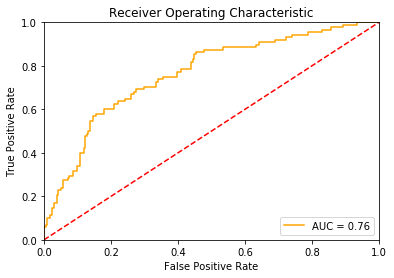

In [15]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

/Users/atpathak/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Confusion matrix
                 Score positive    Score negative
Actual positive       212                 0
Actual negative        88                 0

Accuracy  0.71
 
           Positive      Negative
Num case      212            88
Precision    0.71          0.00
Recall       1.00          0.00
F1           0.83          0.00


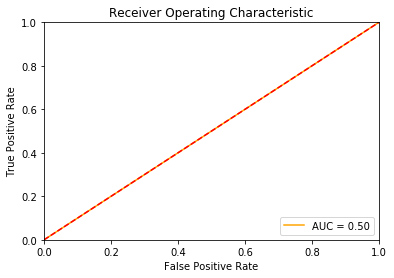

In [16]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive)

In [17]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

/Users/atpathak/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.81149089 0.18850911]
 [0.3503178  0.6496822 ]
 [0.93002071 0.06997929]
 [0.29273608 0.70726392]
 [0.53279492 0.46720508]
 [0.95775916 0.04224084]
 [0.9175878  0.0824122 ]
 [0.53099099 0.46900901]
 [0.84984399 0.15015601]
 [0.86943634 0.13056366]
 [0.52935102 0.47064898]
 [0.36987137 0.63012863]
 [0.46255562 0.53744438]
 [0.69996087 0.30003913]
 [0.36575211 0.63424789]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive       173                39
Actual negative        35                53

Accuracy  0.75
 
           Positive      Negative
Num case      212            88
Precision    0.83          0.58
Recall       0.82          0.60
F1           0.82          0.59


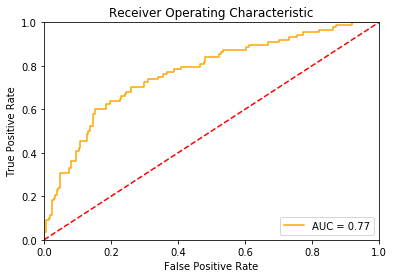

In [19]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)

In [20]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
Actual positive       161                51
Actual negative        30                58

Accuracy  0.73
 
           Positive      Negative
Num case      212            88
Precision    0.84          0.53
Recall       0.76          0.66
F1           0.80          0.59

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
Actual positive       147                65
Actual negative        24                64

Accuracy  0.70
 
           Positive      Negative
Num case      212            88
Precision    0.86          0.50
Recall       0.69          0.73
F1           0.77          0.59

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
Actual positive       139                73
Actual negative        22                66

Accuracy  0.68
 
           Positive      Negative
Num cas